Resulting values and sketches of wave patterns were taken during each stage of the experiment. For clarity of results Jupyter notebook was used to simulate the readings of the oscilloscope and comparisons between theoretical and real values were made.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A sine wave function was used to simulate the AC input.
$$V=Asin(\omega t) + C\tag{16}$$
$$\omega=2\pi f\tag{17}$$
Where A is equal to the amplitude given by (V<sub>pk-pk</sub><sup>+</sup>- V<sub>pk-pk</sub><sup>-</sup>)/2 and C is equal to the starting voltage given by (V<sub>pk-pk</sub><sup>+</sup>+ V<sub>pk-pk</sub><sup>-</sup>)/2.

In [2]:
def sin_gen(vpkp, vpkn, f, cycles):
    """function for generating input sine wave data
    vpkp = positive peak voltage
    vpkn = negative peak voltage
    f = frequency
    cycles = number of cycles to emulate"""
    x = np.linspace(0, f*cycles, f)
    A = (vpkp - vpkn)/2
    c = (vpkp + vpkn)/2
    y = A*np.sin(2*np.pi*f*x) + c
    return x, y

A plotting function was used to create simple plots to emulate osciloscope readings.

In [3]:
def plotting(x, y1, y2, title):
    """function for plotting and comparing input and ouput voltage
    x = time
    y1 = input voltage
    y2 = output voltage
    title = graph title"""
    plt.style.use("grayscale")
    plt.cla()
    plt.xlabel("time (ms)")
    plt.ylabel("Voltage (V)")
    plt.title(title)
    plt.grid()
    plt.plot(x, y1, label="Vin")
    plt.plot(x, y2, '--', label="Vout")
    plt.legend()
    plt.show()

A function was used to check for simulated saturation levels and adjust outputted signal accordingly using the saturation values of op-amp input.

$$V_{sat}^{-} \approx V_{cc}^{-}+1V ; V_{sat}^{+} \approx V_{cc}^{+}+1V\tag{3}$$

In [4]:
def check_sat(data, vcc):
    """function for checking if output voltage saturates
    data = input voltage
    vcc = power source input voltage value (pin 4 and 5 on op-amp)"""
    y = data
    for i in range(len(y)):
        if y[i] >= vcc-1:
            y[i] = vcc-1
        elif y[i] <= -vcc+1:
            y[i] = -vcc+1
    return y

The equation below was used to return the output voltage values of a non-inverting amplifier.
$$V_{out}=(1+\frac{R_{f}}{R})V_{in}\tag{12}$$

In [5]:
def non_inv_amp(x, data, vcc, Rf, R, plot=True):
    """function for simulating non-inverting opp-amp
    x = time
    data = signal input voltage
    vcc = power source input voltage value (pin 4 and 5 on op-amp)
    Rf = feedback resistor value
    R = signal resistor value
    plot is used to turn on and off plotting"""
    gain = (1+(Rf/R))
    y = data*gain
    
    y = check_sat(y, vcc)
    if plot == True:
        plotting(x, data, y, "Votage/time of non-inverting op-amp amplifier")

Voltage input values where then generated and simulated through a non-inverting amplifier with R<sub>f</sub> = 10k$\Omega$ and R = 10k$\Omega$.

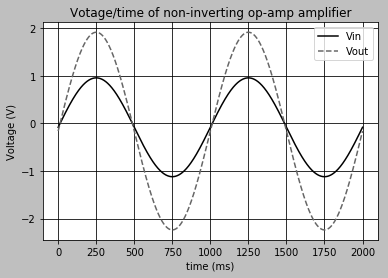

Figure 7: Graph of Vin and Vout of non-inverting op-amp with gain of 2


In [6]:
vpkp = 0.96
vpkn = -1.12
f = 1000
cycles = 2
vcc = 15
Rf = 10000
R = 10000
t, Vin = sin_gen(vpkp, vpkn, f, cycles)
non_inv_amp(t, Vin, vcc, Rf, R)
print("Figure 7: Graph of Vin and Vout of non-inverting op-amp with gain of 2")

The recorded V<sub>in pk-pk</sub> value was 2.08 and the recorded V<sub>out pk-pk</sub> was 4.34 with a calculated gain of 2.09. The theoretical gain was 2 with a V<sub>out pk-pk</sub> value of 4.16. This gave a percentage error of 4.1%



The simulation was repeated changing the value of R to 1k$\Omega$.

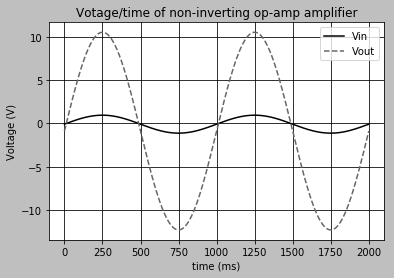

Figure 8: Graph of Vin and Vout of non-inverting op-amp with gain of 11


In [7]:
R = 1000
non_inv_amp(t, Vin, vcc, Rf, R)
print("Figure 8: Graph of Vin and Vout of non-inverting op-amp with gain of 11")

The recorded V<sub>in pk-pk</sub> value was 2.08 and the recorded V<sub>out pk-pk</sub> was 23.6 with a calculated gain of 11.35. The theoritical gain was 11 with a V<sub>out pk-pk</sub> value of 22.88 giving a percentage error of 3.1%

The equation below was used to simulate the output voltage of an inverting op-amp
$$V_{out} = -\frac{R_{f}}{R}V_{in}\tag{8}$$

In [8]:
def inv_amp(x, data, vcc, Rf, R, plot=True):
    gain = -(Rf/R)
    y = data*gain

    y = check_sat(y, vcc)
    if plot == True:
        plotting(x, data, y, "Votage/time of inverting op-amp amplifier")

Voltage input values were carried over and output values generated with R<sub>f</sub> = 10k$\Omega$ and R = 10k$\Omega$.

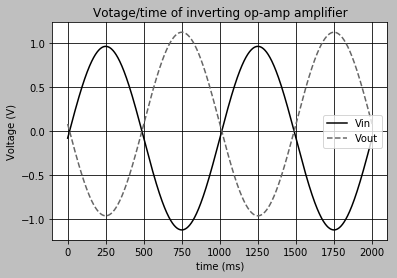

Figure 9: Graph of Vin and Vout of inverting op-amp


In [9]:
R = 10000
inv_amp(t, Vin, vcc, Rf, R)
print("Figure 9: Graph of Vin and Vout of inverting op-amp")

The recorded V<sub>in pk-pk</sub> value was 2.08 and the recorded V<sub>out pk-pk</sub> was -2.16 with a calculated gain of -1.04. The theoritical gain was -1 giving a V<sub>out pk-pk</sub> of -2.08 and percentage error of 3.8%.

V<sub>out</sub> had a phase differnce of $\pi$.

The input resistance value was then changed to 1k$\Omega$.

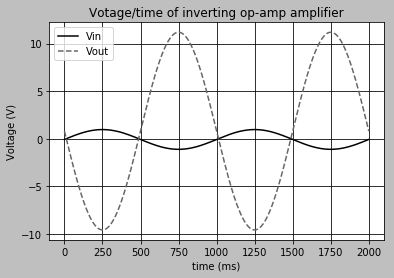

Figure 10: Graph of Vin and Vout of non-inverting op-amp


In [14]:
R = 1000
inv_amp(t, Vin, vcc, Rf, R)
print("Figure 10: Graph of Vin and Vout of non-inverting op-amp")

The recorded V<sub>in pk-pk</sub> value was 2.08 and the recorded V<sub>out pk-pk</sub> was -21.45 with a calculated gain of -10.3. The theoritical gain was -1 giving a V<sub>out pk-pk</sub> of -10 and percentage error of 2.9%.

V<sub>out</sub> had a phase differnce of $\pi$.

V<sub>in</sub> was changed to 5V<sub>pkpk</sub> and simulation run.

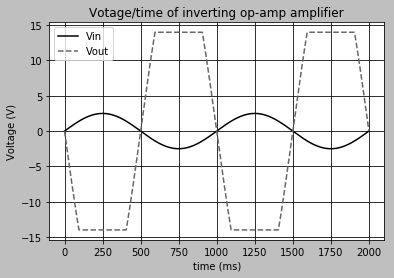

Figure 11: Graph of Vin and Vout of non-inverting op-amp in saturation


In [11]:
Vpkp2 = 2.5
Vpkn2 = -2.5
t, Vin2 = sin_gen(Vpkp2, Vpkn2, f, cycles)
inv_amp(t, Vin2, vcc, Rf, R)
print("Figure 11: Graph of Vin and Vout of non-inverting op-amp in saturation")

Saturation occured at V<sub>out pk-</sub> of x and V<sub>out pk+</sub> of xx.

The following equation was used to simulate the summing amplifier used in the experiment.
$$-(\frac{R_{f}}{R_{1}}V_{in1}+\frac{R_{f}}{R_{2}}V_{in2})\tag{15}$$

In [12]:
def summing(x, input1, input2, vcc, Rf, R1, R2, plot=True):
    gain1 = -(Rf/R1)
    gain2 = -(Rf/R2)
    
    y = gain1*input1 + gain2*input2
    y = check_sat(y, vcc)
    if plot == True:
        plotting(x, input1, y, "Votage/time of inverting summing amplifier")

Summing amplifier was simulated with input 2 set to 1.55V Dc, R<sub>1</sub> to 10k$\Omega$ and R<sub>2</sub> to 1k$\Omega$

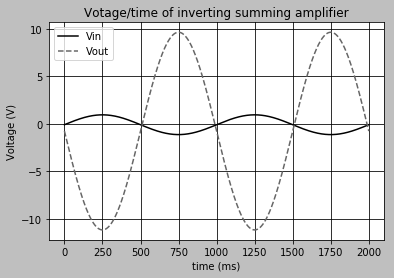

Figure 12: Graph of Vin and Vout of non-inverting summing op-amp and 1.55V DC supply


In [13]:
Vdc = 1.55
R1 = 1000
R2 = 10000
summing(t, Vin, Vdc, vcc, Rf, R1, R2)
print("Figure 12: Graph of Vin and Vout of non-inverting summing op-amp and 1.55V DC supply")

The recorded V<sub>in pk-pk</sub> value was 2 and the recorded V<sub>out pk-pk</sub> was 19.06 with a calculated gain of -9.53.

V<sub>out</sub> had voltage decreased by 1.55V in comparison to Figure 10